In [63]:
# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [64]:
path = './'
df = pd.read_csv(path + "student_grades.csv")

In [65]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [66]:
df.shape

(104, 5)

In [67]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


## Extract information from the results of describe in order to compute IQR and range

In [68]:
IQR
df.describe().quantile(.75)-df.describe().quantile(.25)

student_id     55.375345
exam1          27.250000
exam2          21.250000
exam3          18.500000
final_grade    23.750000
dtype: float64

In [69]:
Range
(df.describe().max())-(df.describe().min())

student_id     103.000000
exam1           89.715156
exam2           93.704297
exam3           95.285801
final_grade     93.081878
dtype: float64

In [70]:
print(df.isnull().sum())

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


## There are 2 ways we can go about plotting histograms for multiple variables.

melt the data frame into a long data set and use seaborn's 'FacetGrid' to plot each histogram quickly.

use matplotlib with subplots

In [71]:
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


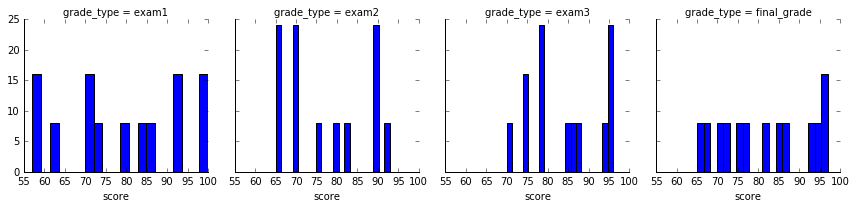

In [72]:
grid = sns.FacetGrid(df_melted, col='grade_type', margin_titles=True)
grid.map(plt.hist, 'score', bins=20);

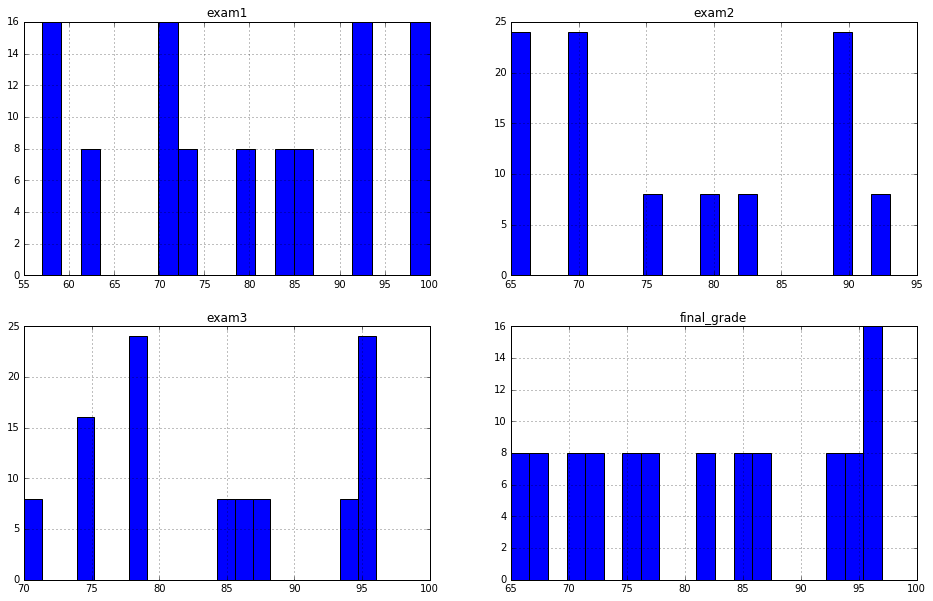

In [73]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

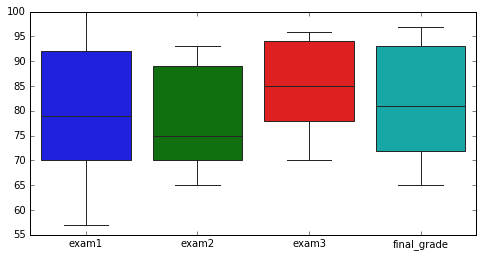

In [74]:
#want to drop student id column; only want x and y
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

In [75]:
# test_train_split
#remove all columns except for independent variables
X = df.drop(['final_grade', 'student_id'], axis=1) #make sure to use capital X
y = df[['final_grade']] #y is dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1) #axis = columns
test = pd.concat([X_test, y_test], axis=1)

Below we show some python code that validates that the splits are what we would expect. That is, we ensure that:

the number of rows in both the x and y training data set are equal

the number of rows in both the x and y testing data set are equal

the number of columns in the training and test data sets are the same

the training data set is 80% of the original data, the test set is 20%

In [76]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


## Seaborn

Graphs are many and are quickly made

Axis and labels are cleaned up later

Color and size are used for information, not asthetics

Graph types include box plts, heatmaps, histograms, density plots, feature or correlation plots

Jointplot: Scatterplot with Density Plots

PairGrid: Scatterplots with Histograms

Heatmap

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


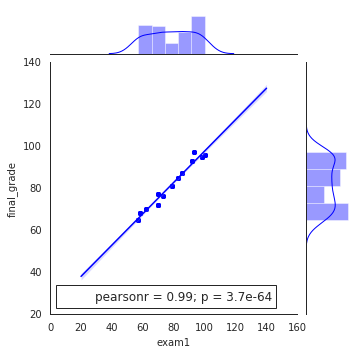

In [77]:
with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

Write a for loop to plot each of the 3 features with final_grade using a jointplot.

What can you say about each relationship (using pearson's r and the p-value)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


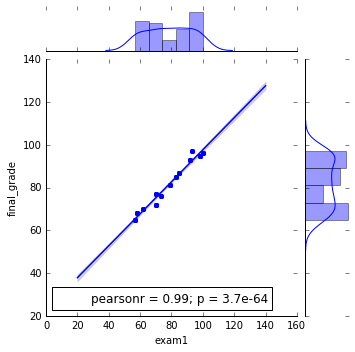

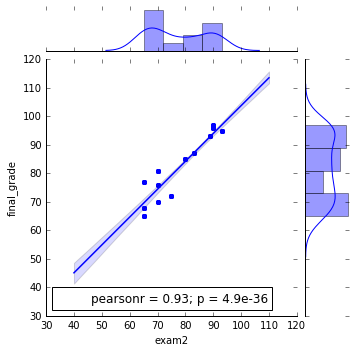

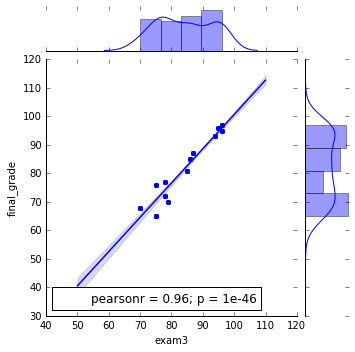

In [78]:
for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    plot_number = i + 1 
    series = df[col]
    j = sns.jointplot(col, "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

The relationship between exam 1 and final grade is the strongest because it has the highest Pearson R and lowest p-value. Next is exam 3, followed by exam 2.

## Pair Grid

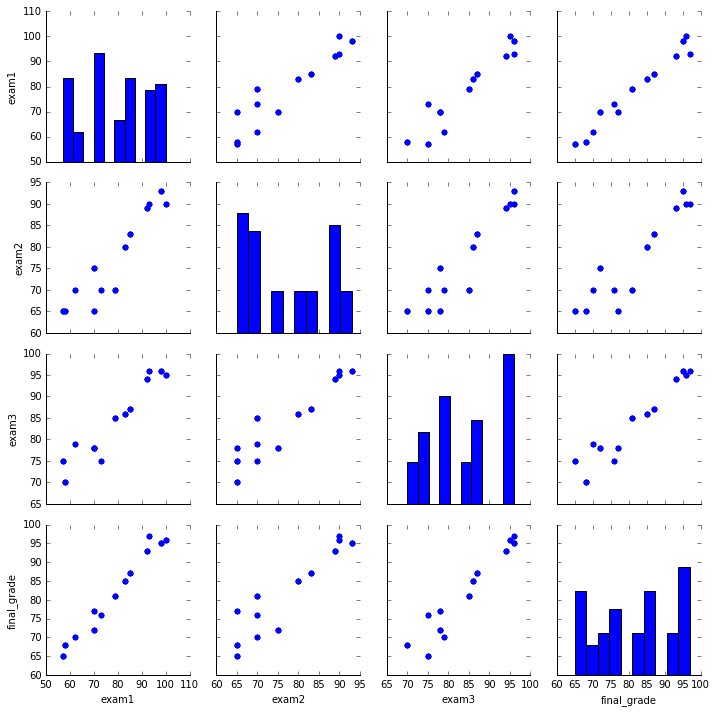

In [79]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## Heatmap

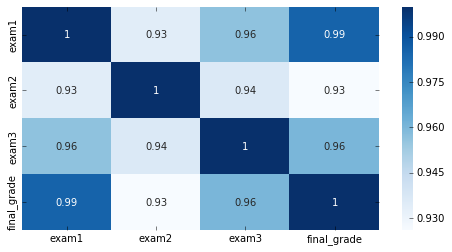

In [80]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Find a way to plot a boxplot and heatmap side by side.

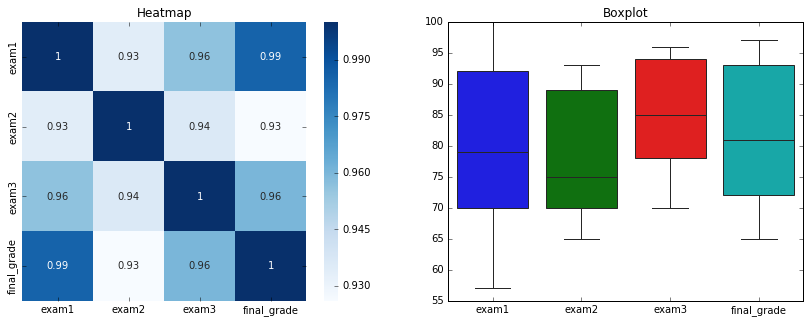

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.set_title('Heatmap')
sns.heatmap(train.corr(), cmap='Blues', annot=True, ax=ax1)
ax2.set_title('Boxplot')
sns.boxplot(data=df.drop(columns=['student_id']), ax=ax2)
plt.show()

In [103]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

In [104]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train] 

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

In [105]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

In [106]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        14:26:46   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LM1 - Exam 1 only

## 1. create linear regression object

In [107]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


## 2. fit/train the model

In [108]:
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[22.88211318]
[[0.74850854]]


## 3. write regression function

In [109]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m): 0.75



## 4. in-sample prediction

In [110]:
y_pred_lm1 = lm1.predict(X_train[['exam1']])

## 5. train in-sample evaluations


In [111]:
#Mean squared error
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 3.37


In [112]:
#R squared value
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

  97.12% of the variance in the students final grade can be explained by the grade on the first exam.


## LM2 - Exam 1 & Exam 3

## 1. create linear regression object

In [113]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


## 2. fit/train the model

In [114]:
lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [117]:
#parameters
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[12.79518052]
[[0.59709165 0.26106586]]


## 3. write regression function

In [119]:
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1): 0.60
    coefficient (m2): 0.26


## 4. in-sample prediction

In [120]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

## 5. train in-sample evaluations; mean squared and r squared

In [121]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 2.94


In [122]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

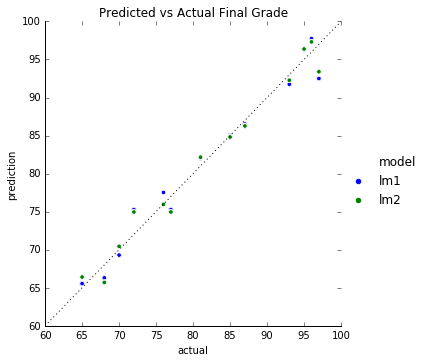

In [123]:
#plot predictions vs values
pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

## LM3 - Exam 3 only

## 1. create linear regression object

In [124]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


## 2. fit/train the model

In [125]:
lm3.fit(X_train[['exam3']], y_train)
print(lm3)

lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-19.62667326]
[[1.20315159]]


## 3. write regression function

In [126]:
print('Univariate - final_exam = b + m * exam3')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate - final_exam = b + m * exam3
    y-intercept (b): -19.63
    coefficient (m): 1.20



## 4. in-sample prediction

In [127]:
y_pred_lm3 = lm3.predict(X_train[['exam3']])

## 5. train in-sample evaluations

In [128]:
#Mean squared error
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

lm3
  mse: 9.08


In [132]:
#R squared value
r2_lm3 = r2_score(y_train, y_pred_lm3)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the third exam.'.format(r2_lm3))

  92.24% of the variance in the students final grade can be explained by the grade on the third exam.


## Evaluate the three models and decide which is best

In [133]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the third exam.'.format(r2_lm3))

  97.12% of the variance in the students final grade can be explained by the grade on the first exam.
  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.
  92.24% of the variance in the students final grade can be explained by the grade on the third exam.


## Compare models

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

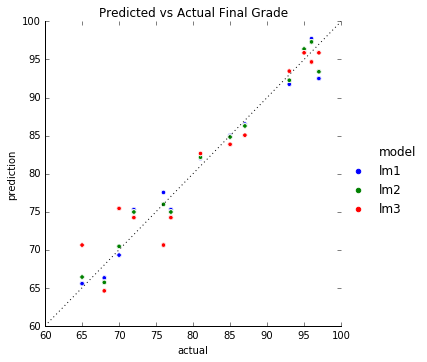

In [134]:
pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel(),
              'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

## Model LM2 is the best because it has the highest R^2 value and the lowest mean squared error

## Out of sample prediction with best model

## LM2:

## 1. make prediction with test set

In [135]:
y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])

## 2. evaluate performance

In [136]:
mse = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse)

Mean squared error: 3.42


In [137]:
r2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2))

97.20% of the variance in the students final grade can be explained by the grades on the first 3 exams.


## 3. plot residuals

Text(0, 0.5, 'Residuals')

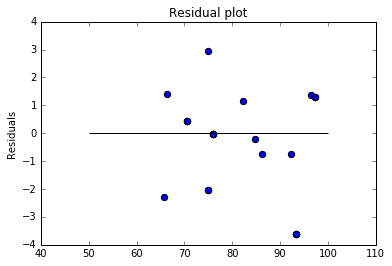

In [139]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='b', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

## LM1:

## 1. make prediction with test set

In [140]:
y_pred_lm1 = lm1.predict(X_test[['exam1']])

## 2. evaluate performance

In [141]:
mse = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error: %.2f" % mse)

Mean squared error: 4.75


In [143]:
r2 = r2_score(y_test, y_pred_lm1)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first exam.'
      .format(r2))

96.12% of the variance in the students final grade can be explained by the grades on the first exam.


## 3. plot residuals

Text(0, 0.5, 'Residuals')

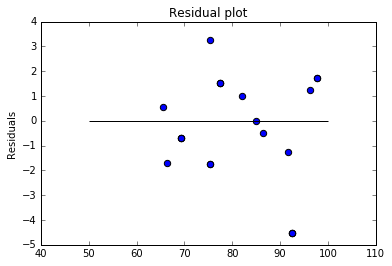

In [144]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='b', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

## LM3:

## 1. make prediction with test set

In [145]:
y_pred_lm3 = lm3.predict(X_test[['exam3']])

## 2. evaluate performance

In [146]:
mse = mean_squared_error(y_test, y_pred_lm3)

print("Mean squared error: %.2f" % mse)

Mean squared error: 12.14


In [147]:
r2 = r2_score(y_test, y_pred_lm3)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the third exam.'
      .format(r2))

90.07% of the variance in the students final grade can be explained by the grades on the third exam.


## 3. plot residuals

Text(0, 0.5, 'Residuals')

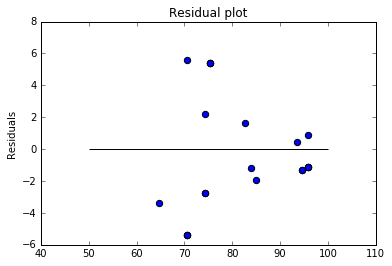

In [148]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='b', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

## LM1 performed better than LM3 in the out of sample prediction